In [27]:
# Importing Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Import data files for training set and testing set

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
# Display training data
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
# Display testing data
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


# Convert categorical data to numeric and separate target feature for training data

In [5]:
# Drop the label to create the X data
X = train_df.drop('loan_status', axis=1)
X

X_train = pd.get_dummies(X)
print(X_train.columns)
print(X_train)
# Converting output labels to 0 and 1
y_train = LabelEncoder().fit_transform(train_df['loan_status'])
y_train

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

array([1, 1, 1, ..., 0, 0, 0])

# Convert categorical data to numeric and separate target feature for testing data

In [6]:
# Drop the label to create the X data
X1 = test_df.drop('loan_status', axis=1)
X1

X_test = pd.get_dummies(X1)
print(X_test.columns)
print(X_test)
# Converting output labels to 0 and 1
y_test = LabelEncoder().fit_transform(test_df['loan_status'])
y_test

Index(['Unnamed: 0', 'index', 'loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc'

array([1, 1, 1, ..., 0, 0, 0])

# Adding missing dummy variables to testing set

In [7]:
# Get missing columns in the test data
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]
X_test

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,0,1,1,0,1,0,1,0,1,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,0,1,0,1,1,0,1,0,1,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,1,1,1,0,1,0,1,0,1,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,0,1,0,1,1,0,1,0,1,0


In [8]:
# Displaying X_train to compare number of columns with X_test
X_train

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,0,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,...,1,1,0,1,1,0,1,0,1,0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,...,0,1,0,1,1,0,1,0,1,0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,...,0,1,0,1,0,1,1,0,1,0


# Train the Logistic Regression model on the unscaled data and print the model score

In [13]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)
classifier

LogisticRegression(C=10, max_iter=10000, tol=0.01)

In [14]:
classifier.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=10000, tol=0.01)

In [15]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6959770114942528
Testing Data Score: 0.5603998298596342


In [21]:
# Create a confusion matrix and get a classification report
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[ 457, 1894],
       [ 173, 2178]])

In [22]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.19      0.31      2351
           1       0.53      0.93      0.68      2351

    accuracy                           0.56      4702
   macro avg       0.63      0.56      0.49      4702
weighted avg       0.63      0.56      0.49      4702



# Train a Random Forest Classifier model and print the model score

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Fit random forest and get training and testing score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 1.0
Testing Score: 0.6180348787749894


In [25]:
# Get feature importance
feature_importances = clf.feature_importances_

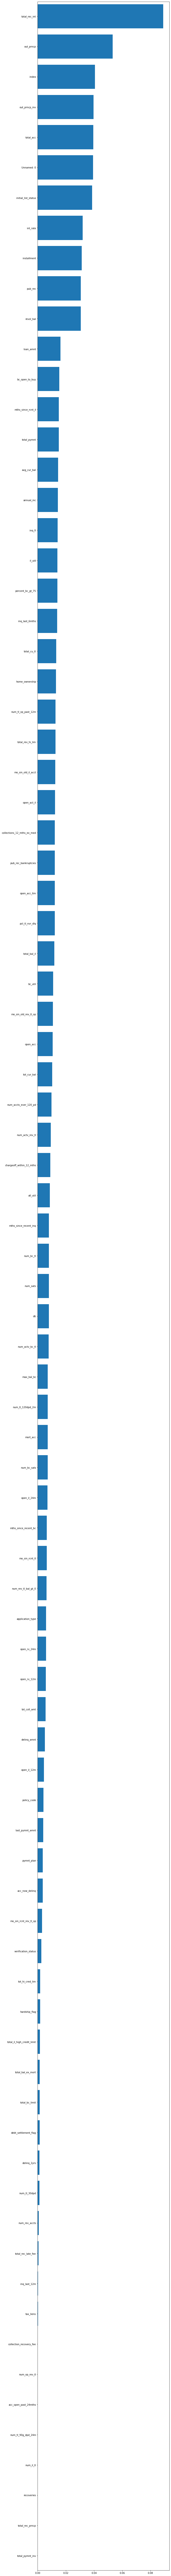

In [28]:
# Plot the features
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# Scale the data

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data and print the model score

In [30]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10, tol=0.01, solver='lbfgs', max_iter=10000)
classifier

LogisticRegression(C=10, max_iter=10000, tol=0.01)

In [31]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=10, max_iter=10000, tol=0.01)

In [32]:
# Validate the model by using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7135467980295567
Testing Data Score: 0.7003402807316036


In [33]:
# Create a confusion matrix and get a classification report
from sklearn.metrics import confusion_matrix, classification_report

y_true = y_test
y_pred = classifier.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[1147, 1204],
       [ 205, 2146]])

In [34]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.49      0.62      2351
           1       0.64      0.91      0.75      2351

    accuracy                           0.70      4702
   macro avg       0.74      0.70      0.69      4702
weighted avg       0.74      0.70      0.69      4702



# Train a Random Forest Classifier model on the scaled data and print the model score

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Fit random forest and get training and testing score
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6193109315185028


In [36]:
# Get feature importance
feature_importances = clf.feature_importances_

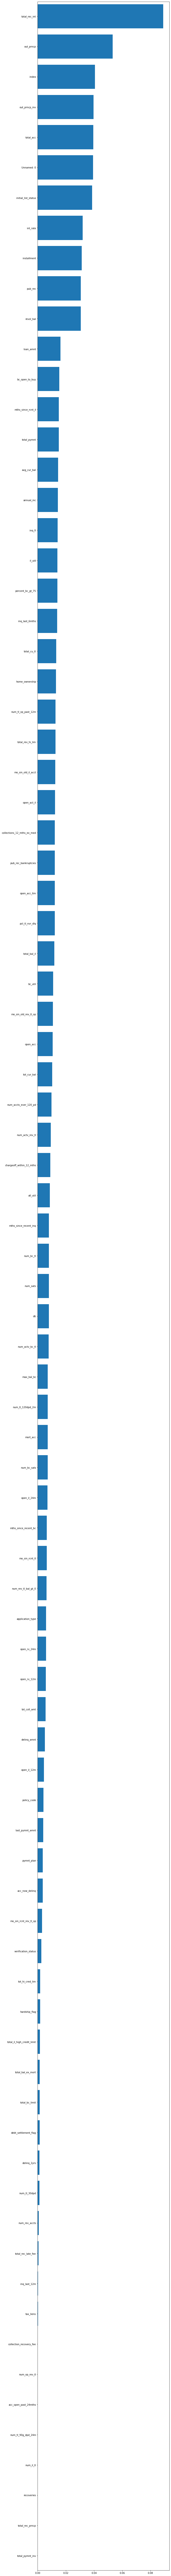

In [37]:
# Plot the features
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()